<a href="https://colab.research.google.com/github/Wittypanda/OIBSIP/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 03 : Car price prediction with machine learning**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNet
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [40]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'
df = pd.read_csv(url)
# print(df.head(5))

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [42]:
#checking the null value.
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [43]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [44]:
#checking the correlation between the pair of columns
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

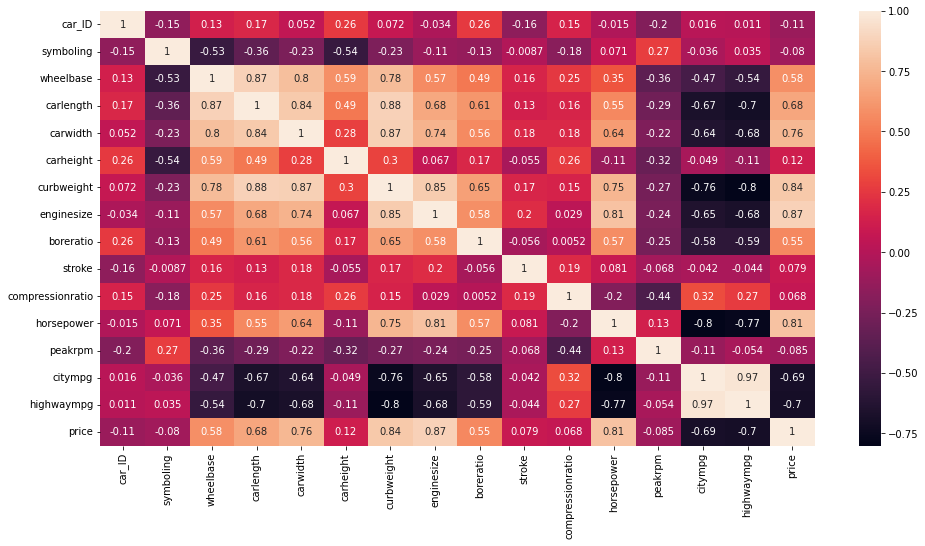

In [45]:
# graphycally represent the correaletion with heatmap 
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [46]:
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns 
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr   

In [47]:
#calling the fuction
corr_feature = correlation(df.iloc[:,:-1],0.90)
len(set(corr_feature))

1

In [48]:
#these are the highly correletd independent features ,we should remove this... 
corr_feature

{'highwaympg'}

In [49]:
#dropping the highly correlated features
df=df.drop(['highwaympg'],axis =1)
df.shape

(205, 25)

In [50]:
#getting the categorical and numerical columns from df
numeric_col=[col for col in df if df[col].dtype !="object" ]
categorical_col=[col for col in df if df[col].dtype=="object" ]

In [51]:
numeric_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'price']

In [52]:
#removing car_id and price col 
numeric_col.remove("car_ID")
numeric_col.remove("price")

In [53]:
categorical_col

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [54]:
#removing the carname columns 
categorical_col.remove("CarName")

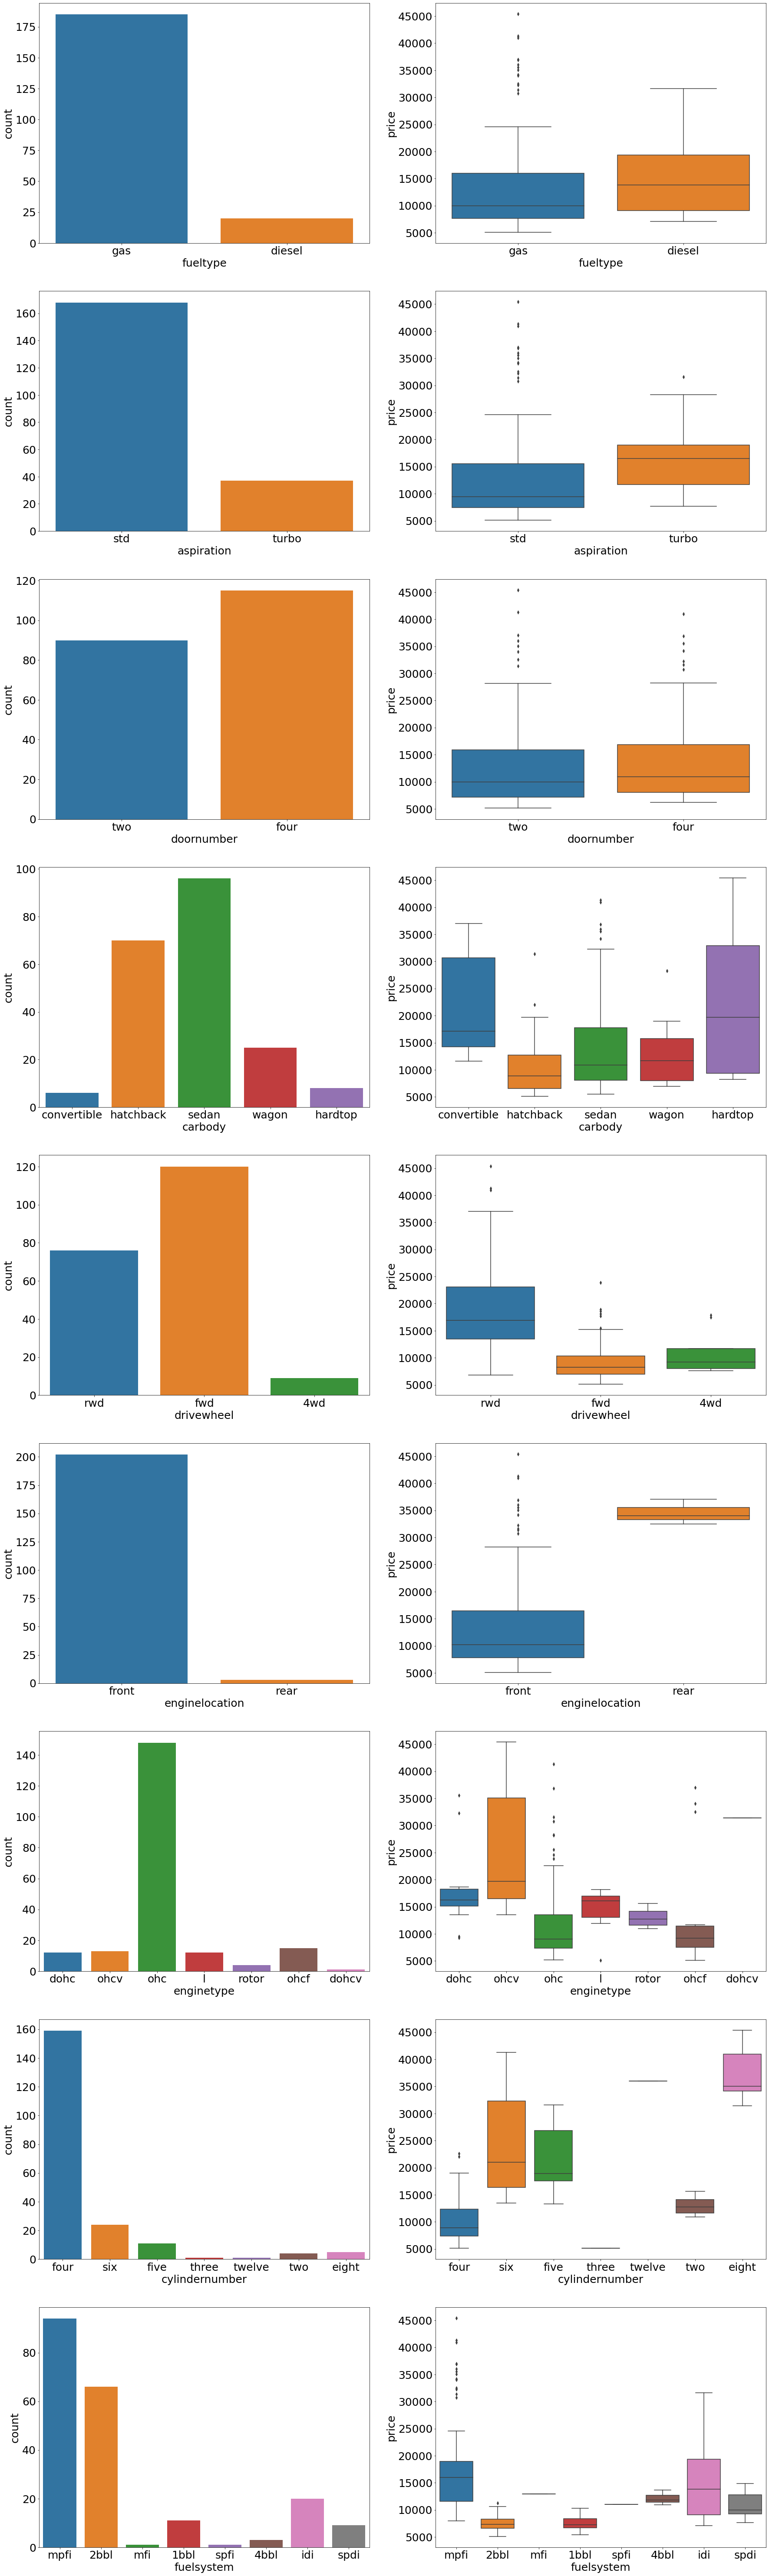

In [55]:
#analysis the categorical columns with count and box plot 
#using count plot we perform univariant analysis 
#using box plot we perform bivariant alalysis
i=1
plt.figure(figsize=(30,120))
for col in categorical_col:
    plt.subplot(10,2,i)
    sns.countplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(10,2,i)
    sns.boxplot(x=df[col],y=df["price"])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    i=i+1

plt.show()

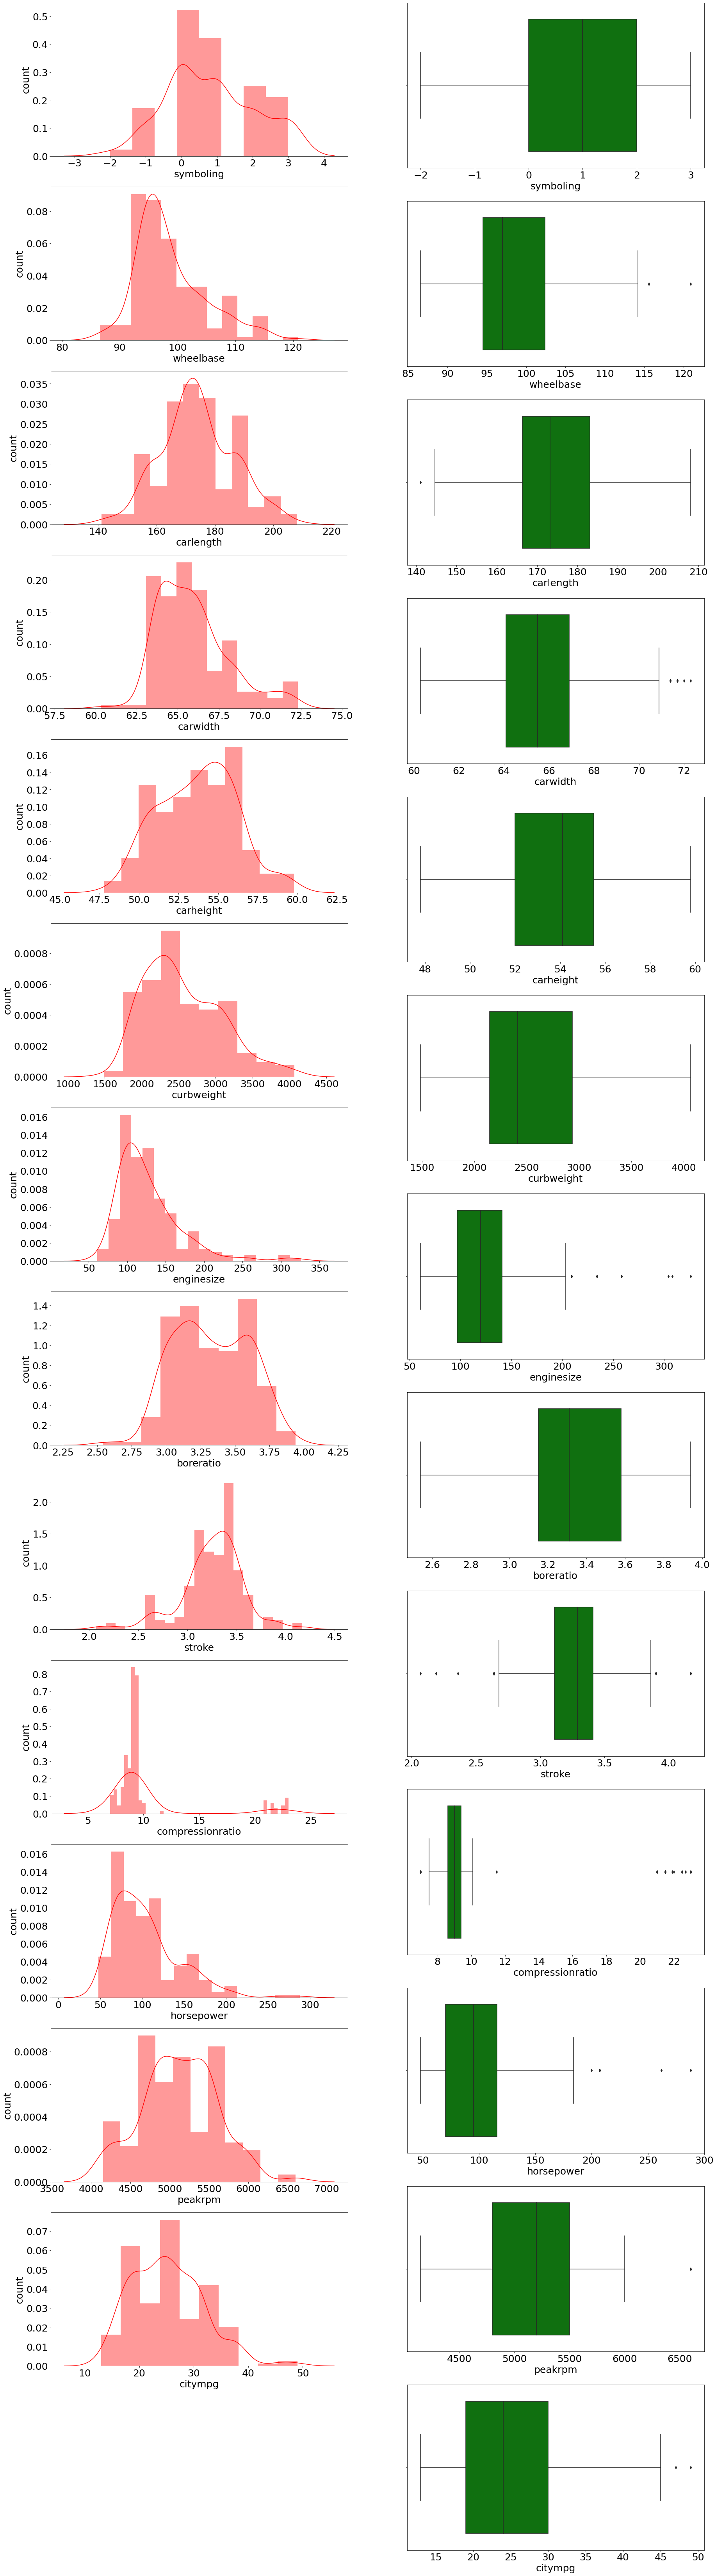

In [56]:
#analysis the numerical columns with dist and box plot 

i=1
plt.figure(figsize=(30,120))
for col in numeric_col:
    plt.subplot(14,2,i)
    sns.distplot(df[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(13,2,i)
    sns.boxplot(df[col],color="green")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1

plt.show()

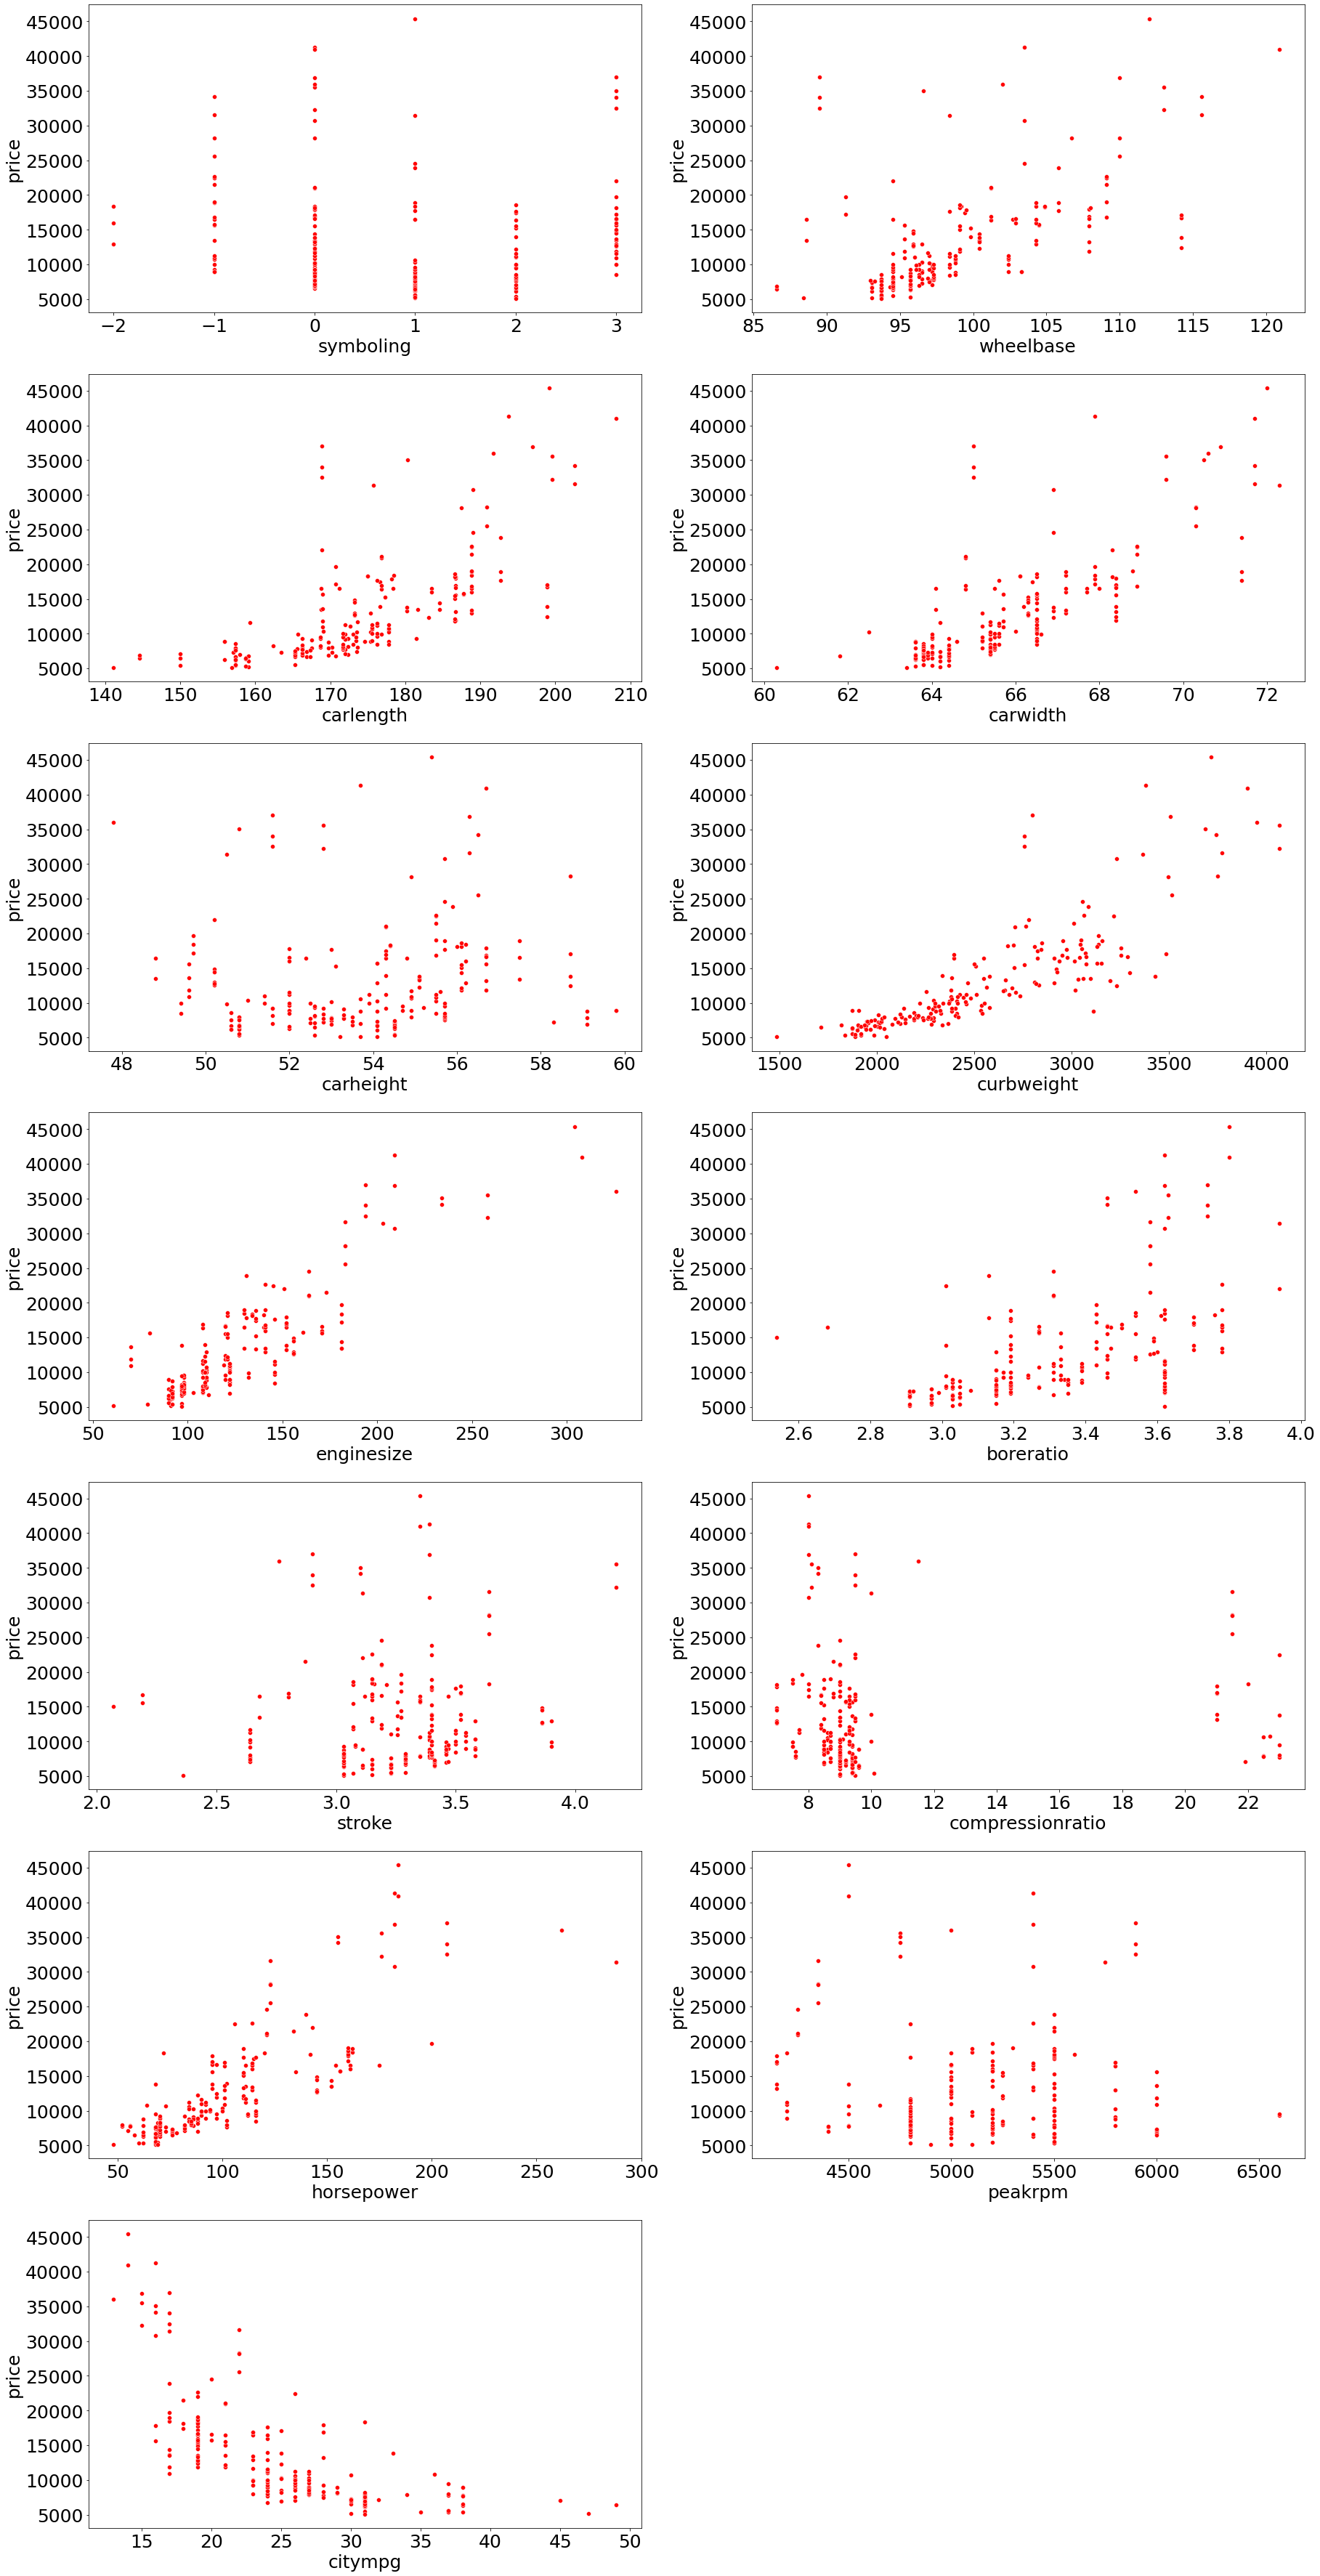

In [57]:
#analysis the numerical col with scatter plot 
i=1
plt.figure(figsize=(30,120))
for col in numeric_col:
    plt.subplot(13,2,i)
    sns.scatterplot(df[col],df["price"],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    
    i=i+1

plt.show()

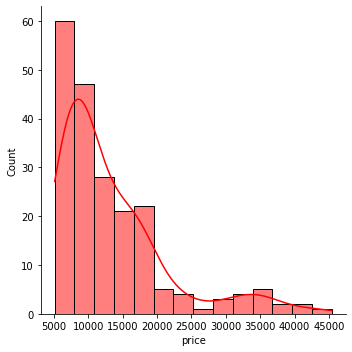

In [58]:
sns.displot(df["price"],color="r",kde=True)

In [59]:
df["price"].skew()

1.7776781560914454

In [60]:
#transform the price col using log transformer
ft=FunctionTransformer(func=np.log1p)
df["price"]=ft.fit_transform(df["price"])

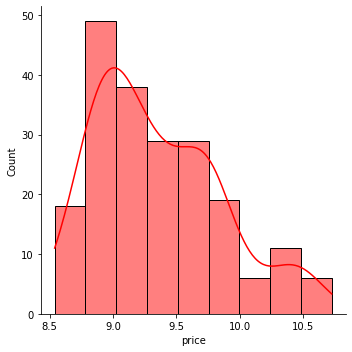

In [61]:
#after transform the price col
sns.displot(df["price"],color="r",kde=True)

In [62]:
#get features and terget columns 
X=df[['symboling','wheelbase','carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm',
      'citympg','fueltype','aspiration','doornumber','carbody',
 'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','carlength','curbweight','enginesize']]
Y=df.price
X.shape

(205, 22)

In [63]:
#finding skewed columns using this function
def distribution(data):
    #let find the skewed col and fix them
    skew_limit=0.75 # limit for skewed col
    skew_vals=data[numeric_col].skew()
    skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)
    
    #graphically represent the skewed col
    i=1    
    print("Columns names: ",skew_col.index)
    print(skew_col)
    plt.figure(figsize=(30,30))
    for col in skew_col.index:
        plt.subplot(5,2,i)
        sns.distplot(X[col],color="r")
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel(col,fontsize=25)
        i=i+1
        

    plt.show()

Columns names:  Index(['compressionratio', 'enginesize', 'horsepower', 'wheelbase',
       'carwidth'],
      dtype='object')
compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64


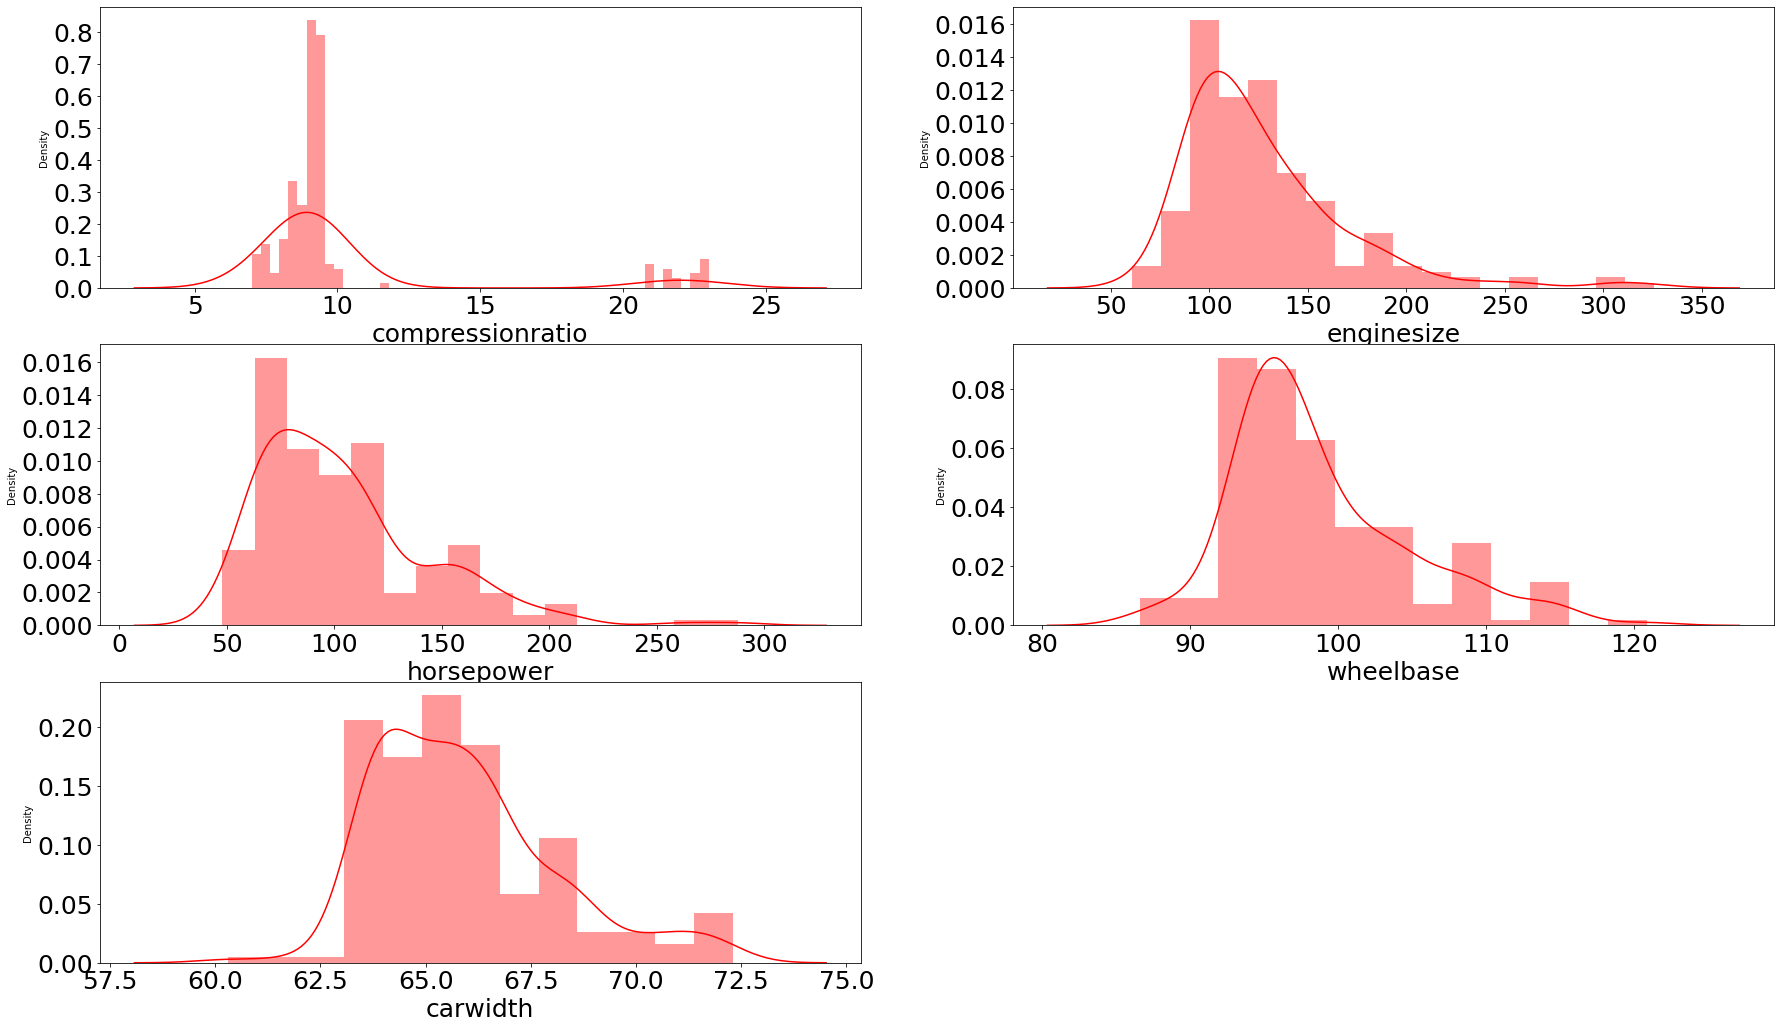

In [64]:
#calling the function
distribution(X)

In [65]:
#fix the skewed columns using function transformer

skew_col=['compressionratio','horsepower','wheelbase', 'carwidth',"enginesize"] #these two col perform well for power transform
ft=FunctionTransformer(func=np.log1p)
X[skew_col]=ft.fit_transform(X[skew_col])
X.head()

,symboling,wheelbase,carwidth,carheight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carlength,curbweight,enginesize
0,3,4.495355,4.175925,48.8,3.47,2.68,2.302585,4.718499,5000,21,...,two,convertible,rwd,front,dohc,four,mpfi,168.8,2548,4.875197
1,3,4.495355,4.175925,48.8,3.47,2.68,2.302585,4.718499,5000,21,...,two,convertible,rwd,front,dohc,four,mpfi,168.8,2548,4.875197
2,1,4.559126,4.197202,52.4,2.68,3.47,2.302585,5.043425,5000,19,...,two,hatchback,rwd,front,ohcv,six,mpfi,171.2,2823,5.030438
3,2,4.613138,4.207673,54.3,3.19,3.40,2.397895,4.634729,5500,24,...,four,sedan,fwd,front,ohc,four,mpfi,176.6,2337,4.700480
4,2,4.609162,4.210645,54.3,3.19,3.40,2.197225,4.753590,5500,18,...,four,sedan,4wd,front,ohc,five,mpfi,176.6,2824,4.919981


In [66]:
#Encoding the categorical columns into numerical columns 
cat_col=[col for col in X if X[col].dtype=="object" ] #get the cat col
X=pd.get_dummies(X,columns=cat_col,drop_first=True) #using pandas function

#scaling all the columns 
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X)

In [67]:
#finally our features look like this ,take a look!!!!!!
X

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.743470,-1.801353,-0.851698,-2.020417,0.519071,-1.839377,-0.253368,0.365318,-0.262960,-0.646553,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,1.743470,-1.801353,-0.851698,-2.020417,0.519071,-1.839377,-0.253368,0.365318,-0.262960,-0.646553,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,0.133509,-0.713827,-0.177732,-0.543527,-2.404880,0.685946,-0.253368,1.319046,-0.262960,-0.953012,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.938490,0.207276,0.153949,0.235942,-0.517266,0.462183,0.111329,0.119435,0.787855,-0.186865,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.938490,0.139468,0.248080,0.235942,-0.517266,0.462183,-0.656522,0.468318,0.787855,-1.106241,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.712271,1.401712,0.728239,1.666445,-0.336970,-0.066676,0.442905,0.577692,-0.340094,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
201,-1.476452,1.712271,1.356365,0.728239,1.666445,-0.336970,-0.369918,1.430523,0.367529,-0.953012,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
202,-1.476452,1.712271,1.401712,0.728239,0.926204,-1.232021,-0.330672,0.913545,0.787855,-1.106241,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
203,-1.476452,1.712271,1.401712,0.728239,-1.183483,0.462183,3.096542,0.231266,-0.683286,0.119594,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014


In [68]:
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (164, 42)
X_test shape:  (41, 42)
Y_train shape:  (164,)
Y_test shape:  (41,)


In [69]:
#evaluate and disply the performance of models
def evaluate(model):
    model.fit(x_train,y_train)
    y_pred_m=model.predict(x_test) 
    
    #(Y_pred_m) and (y_test) contain log transformed values not real valued price ..
    #so we inversely apply log transform to get real price value...
    ft=FunctionTransformer(func=np.log1p,inverse_func=np.exp)
    inv_y_pred=ft.inverse_transform(y_pred_m)
    inv_y_test=ft.inverse_transform(y_test)
    
    #printing the model name and accuracy !!!!!
    print("Model name: ",model)
    print("R2 score :--->>",r2_score(inv_y_test,inv_y_pred))
    print("MSE :--->>",mean_squared_error(inv_y_test,inv_y_pred))
    print("MAE :--->>",mean_absolute_error(inv_y_test,inv_y_pred))
    print("<<<<------------------------------------------------------------->>>>")
    

In [70]:
#Initialize the models 
lr=LinearRegression() #Linear regressor
lasso=LassoCV() #Lasso regression
R=RidgeCV() #Ridge regression
knn=KNeighborsRegressor() 
svr=SVR() # support vector regressor
dtr=DecisionTreeRegressor()

models=[lr,lasso,R,knn,svr,dtr] #create a list of models 

for model in models:
    evaluate(model)

Model name:  LinearRegression()
R2 score :--->> 0.9095328966534463
MSE :--->> 7141836.8955124905
MAE :--->> 1767.3195368120303
<<<<------------------------------------------------------------->>>>
Model name:  LassoCV()
R2 score :--->> 0.8741475984508028
MSE :--->> 9935294.61565489
MAE :--->> 1813.7127636563444
<<<<------------------------------------------------------------->>>>
Model name:  RidgeCV()
R2 score :--->> 0.8924086209101074
MSE :--->> 8493696.077343645
MAE :--->> 1747.3527793225549
<<<<------------------------------------------------------------->>>>
Model name:  KNeighborsRegressor()
R2 score :--->> 0.7557817117542358
MSE :--->> 19279573.646467876
MAE :--->> 2663.7723616222183
<<<<------------------------------------------------------------->>>>
Model name:  SVR()
R2 score :--->> 0.8389621502530284
MSE :--->> 12712975.372840103
MAE :--->> 2116.5844386095346
<<<<------------------------------------------------------------->>>>
Model name:  DecisionTreeRegressor()
R2 score 

In [71]:
# lets apply our Ensamble models on this data
rf=RandomForestRegressor(n_estimators=200,random_state=42)
ada=AdaBoostRegressor(random_state=42)
gbr=GradientBoostingRegressor(random_state=42)
xgb=XGBRegressor()

modls=[rf,ada,gbr,xgb] #list of ensamble models 
for model in modls:
    evaluate(model)

Model name:  RandomForestRegressor(n_estimators=200, random_state=42)
R2 score :--->> 0.9576300305686236
MSE :--->> 3344855.7514610407
MAE :--->> 1284.1690558038358
<<<<------------------------------------------------------------->>>>
Model name:  AdaBoostRegressor(random_state=42)
R2 score :--->> 0.9034163524241914
MSE :--->> 7624701.49085814
MAE :--->> 1910.648896546213
<<<<------------------------------------------------------------->>>>
Model name:  GradientBoostingRegressor(random_state=42)
R2 score :--->> 0.922738813264302
MSE :--->> 6099308.7388500795
MAE :--->> 1667.4611632646026
<<<<------------------------------------------------------------->>>>
Model name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, impor

# **End of Project**